# Programming for Social Science : GEOG5995M

This script corresponds to the practicals 1 to 4 included (Agent based modelling to Building tools) from GEOG1.
All the steps have been followed but are not necessarily coded in the order of the practicals as new functionalities are built on the same script. 

This script includes : 
- creation of an agent represented by a list of coordinates y and x.
- modification of agent coordinates through random process : a 'move'
- loop process : make the agent move multiple times
- loop process : make multiple agents move multiple times
- define a distance function between two agents
- compute the distance between all agents in an efficient way using Python timing methods.
- include testing options with docstring method (for distance method). 

In [79]:
import random as rd
import matplotlib.pyplot as plt
import timeit as tt
import time
import operator

In [12]:
#create 2 variables, x and y:
y0=50
x0=50

In [13]:
# move an agent with coordinates x0, y0 randomly:
if rd.random()<0.5:
    #with a probability of 0.5, move up y:
    y+=1
else:
    #with a probability of 0.5, move down y:
    y-=1
if rd.random()<0.5:
    #move up or down, independantly from y, x:
    x+=1
else:
    x-=1

In [15]:
#move n times one agent of coordinates x and y:
n=10
x=50
y=50
traj=[]
for i in range (n):
    #loop through [0,n] and move each time
    if rd.random()<0.5:
        y+=1
    else:
        y-=1
    if rd.random()<0.5:
        x+=1
    else:
        x-=1
    #store the last value of x and y into a list
    traj.append([y,x])

#show the result to check the code
print(traj)

[[49, 49], [50, 48], [49, 47], [48, 46], [47, 45], [46, 44], [47, 43], [46, 42], [47, 43], [46, 42]]


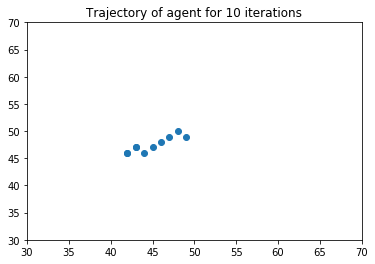

In [24]:
#plot the trajectory of this agent for the different iterations inside a zoomed box (30,70)
plt.xlim(30,70)
plt.ylim(30,70)
plt.scatter([newcoord[i][1]for i in range (n)],[newcoord[i][0]for i in range (n)])
plt.title('Trajectory of agent for '+str(n)+' iterations')
plt.show()

In [39]:
#create number_agents random agents with the 'for' loop:
number_agents=10
#initialise an empty list
agents=[]
#loop through [0,number_agents]:
for i in range (number_agents):
    #give random integer numbers to y and x between 0 and 100
    y=rd.randint(0,100)
    x=rd.randint(0,100)
    #store latest values of y and x
    agents.append([y,x])
#show the result to check the code
print(agents)
    

[[90, 65], [56, 43], [24, 79], [45, 3], [71, 80], [38, 100], [31, 76], [30, 97], [91, 3], [73, 19]]


In [60]:
#create number of agents with an intern loop inside the list : shorter but faster? 
#time different
code_to_test1='''import random as rd;number_agents=1000
agents=[]
for i in range (number_agents):
    y=rd.randint(0,100)
    x=rd.randint(0,100)
    #store latest values of y and x
    agents.append([y,x])'''
code_to_test2='''import random as rd;number_agents=1000;agents=[[rd.randint(0,100),rd.randint(0,100)] for i in range(number_agents)]'''

time1=tt.timeit(code_to_test1,number=1000)/1000
print(time1)
time2=tt.timeit(code_to_test2,number=1000)/1000
print(time2)
#

0.0039218084140002244

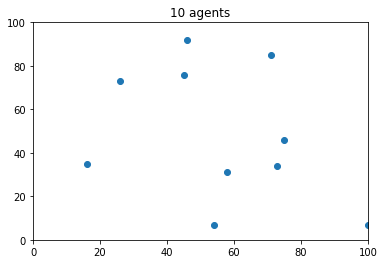

In [29]:
#plot position of all the agents for the different iterations inside a box (0,100)
plt.xlim(0,100)
plt.ylim(0,100)
plt.scatter([agents[i][1]for i in range (number_agents)],[agents[i][0]for i in range (number_agents)])
plt.title(str(number_agents)+' agents')
plt.show()

In [81]:
#print the agent that is farthest away using the getitem to force Python to sort by x and not y : 
print(max(agents, key=operator.itemgetter(1))) #max x
print(max(agents))#max y

[38, 100]
[91, 3]


In [ ]:
#make all number_agents of agents move a number_iteration times :
number_iterations=10

for j in range(number_iterations)
    for i in range(number_agents):
        if rd.random()<0.5:
            agents[i][0]+=1
        else:
            agents[i][0]-=1

        if rd.random()<0.5:
            agents[i][1]+=1
        else:
            agents[i][1]-=1
#we note that all moves are independant because the random seed is not fixed. We could store these values as trajectories in lists. 

In [ ]:
#boundary problems : we create a grid on a 0,99 grid and give it a "tore" shape so that points don't leave the grid:
#we use % that gives the remainder of euclidean division by 100 so makes it go to the other side. 
for j in range(number_iterations):    
    for i in range(number_agents):
        if rd.random()<0.5:
            agents[i][0] = (agents[i][0] + 1) % 100
        else:
            agents[i][0] = (agents[i][0] - 1) % 100

        if rd.random()<0.5:
            agents[i][1] = (agents[i][1] + 1) % 100
        else:
            agents[i][1] = (agents[i][1] + 1) % 100



In [30]:
#define the distance between two agents by using a function:
def distance(agent1,agent2):
    #add doc tests by including command lines into the documentation
    """
    Computes the Euclidean distance between two points.

    >>> distance([0,0],[0,1])
    1
    """
    dist=((agent1[0]-agent2[0])**2+(agent1[1]-agent2[1])**2)**0.5
    return(dist)

In [35]:
#check the distance works fine for easy values without doctest: 
agent_a=[0,0]
agent_b=[0,1]
print(distance(agent_a,agent_b)==1)



In [76]:
#calculated the distance between all couples of points:
begin=time.time()
distance_all=[]
for origin in range(number_agents):
    distance_origin=[]
    for i in range(0,number_agents):
        if i!=origin :
            dist=distance(agents[origin],agents[i])
            distance_origin.append(dist)
    distance_all.append(distance_origin)
end=time.time()
duration=end-begin;print(duration)


0.00033926963806152344


In [77]:
#get rid of doubles : calculate the distance between points only once
begin=time.time()
distance_nodouble=[]
for origin in range(number_agents):
    distance_origin=[]
    for i in range(origin,number_agents):
        if i!=origin :
            dist=distance(agents[origin],agents[i])
            distance_origin.append(dist)
    distance_nodouble.append(distance_origin)
end=time.time()
duration=end-begin;print(duration)

0.0002570152282714844


In [78]:
#Time the process with timeit : problem > recompute variables inside code
code_dist1='''import random as rd;number_agents=100
def distance(agent1,agent2):
    dist=((agent1[0]-agent2[0])**2+(agent1[1]-agent2[1])**2)**0.5
    return(dist)
agents=[]
for i in range (number_agents):
    y=rd.randint(0,100)
    x=rd.randint(0,100)
    #store latest values of y and x
    agents.append([y,x])
distance_all=[]
for origin in range(number_agents):
    distance_origin=[]
    for i in range(0,number_agents):
        if i!=origin :
            dist=distance(agents[origin],agents[i])
            distance_origin.append(dist)
    distance_all.append(distance_origin)'''

code_dist2='''import random as rd;number_agents=100
def distance(agent1,agent2):
    dist=((agent1[0]-agent2[0])**2+(agent1[1]-agent2[1])**2)**0.5
    return(dist)
agents=[]
for i in range (number_agents):
    y=rd.randint(0,100)
    x=rd.randint(0,100)
    #store latest values of y and x
    agents.append([y,x])
distance_all=[]
for origin in range(number_agents):
    distance_origin=[]
    for i in range(origin,number_agents):
        if i!=origin :
            dist=distance(agents[origin],agents[i])
            distance_origin.append(dist)
    distance_all.append(distance_origin)'''

time1=tt.timeit(code_dist1,number=1000)/1000

time2=tt.timeit(code_dist2,number=1000)/1000
print(time1,time2)
#the second option is a lot quicker of course

0.017458753360000627 0.008958218412000861
